<a href="https://colab.research.google.com/github/mingshey/python_mechanics/blob/main/Python%EA%B3%A0%EC%A0%84%EC%97%AD%ED%95%99_011_Fowles_7_4_Trojan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analytical Mechanics with Python
# 파이썬으로 코딩하는 고전역학

# 7.4 제한된 3입자 문제

라그랑주 점 근처의 운동

In [ ]:
import numpy as np
import sympy as smp
from sympy import symbols, Eq, Function
from sympy.solvers.ode.systems import dsolve_system

In [ ]:
from scipy.integrate import solve_ivp

In [ ]:

x, y, u, v = symbols("x y u v")
alpha = symbols(r"\alpha")
t = symbols("t")

In [ ]:
r1 = smp.sqrt((x - alpha)**2 + y**2)
r2 = smp.sqrt((x + 1 - alpha)**2 + y**2)

In [ ]:
r1

sqrt(y**2 + (-\alpha + x)**2)

In [ ]:
r2

In [ ]:
Phi = - (1 - alpha) / r1 + (-alpha) / r2 - (x**2 + y**2) / 2
Phi

-\alpha/sqrt(y**2 + (-\alpha + x + 1)**2) - x**2/2 - y**2/2 + (\alpha - 1)/sqrt(y**2 + (-\alpha + x)**2)

In [ ]:
xs = np.linspace(-1.5, 1.5, 201)
xm, ym = np.meshgrid(xs, xs)

In [ ]:
Phif = smp.lambdify([x, y, alpha], Phi)

In [ ]:
alpha_v = 0.000953875

Phis = Phif(xm, ym, alpha_v)

In [ ]:
Phis.min(), Phis.max()

(np.float64(-1047.3563472637964), np.float64(-1.4995251451171987))

In [ ]:
import matplotlib.pyplot as plt

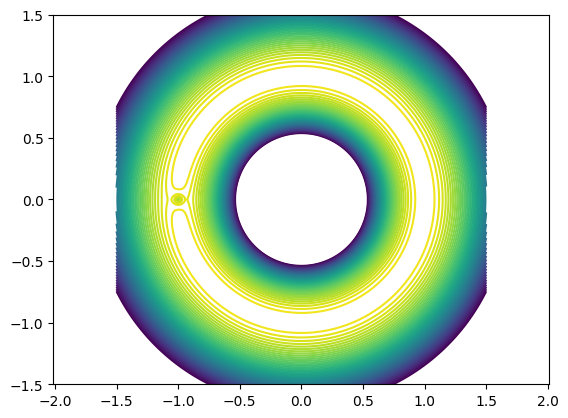

In [ ]:
plt.axis("equal")
plt.contour(xm, ym, Phis, np.linspace(-2.0, -1.4995, 50))

In [ ]:
from mpl_toolkits.mplot3d import axes3d

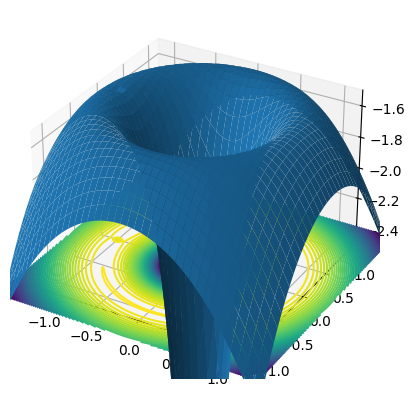

In [ ]:
ax = plt.figure().add_subplot(projection='3d')

ax.plot_surface(xm, ym, Phis)
ax.contour(xm, ym, Phis, np.linspace(-2.5, -1.5, 50), zdir='z', offset=-2.5)

ax.set(xlim=(-1.2, 1.2), ylim=(-1.2, 1.2), zlim=(-2.5, -1.5))
plt.show()

In [ ]:
dudt = -(1 - alpha) * (x - alpha) / r1**3 - alpha * (x + 1 - alpha) / r2**3 + x + 2 * v
dvdt =  -(1 - alpha) * y / r1**3 - alpha * y / r2**3 + y - 2 * u

In [ ]:
dudt

-\alpha*(-\alpha + x + 1)/(y**2 + (-\alpha + x + 1)**2)**(3/2) + 2*v + x + (-\alpha + x)*(\alpha - 1)/(y**2 + (-\alpha + x)**2)**(3/2)

In [ ]:
dvdt

-\alpha*y/(y**2 + (-\alpha + x + 1)**2)**(3/2) - 2*u + y*(\alpha - 1)/(y**2 + (-\alpha + x)**2)**(3/2) + y

In [ ]:
dudtf = smp.lambdify([x, y, u, v, alpha], dudt)
dvdtf = smp.lambdify([x, y, u, v, alpha], dvdt)

In [ ]:
def dSdt(t, S, alpha, foo, bar):
  x, y, u, v = S   # 회전 좌표계 성분들 (x = x', y = y', u = dx'/dt, v = dy'/dt)

  return (u, v, dudtf(x,y,u,v,alpha), dvdtf(x,y,u,v,alpha))

In [ ]:
class Simulation():
  def __init__(self, fun, S0, alpha, tspan, ts, dt):
    self.dSdt = fun
    self.alpha = alpha
    self.S0 = S0
    self.tspan = tspan
    self.ts = ts
    self.dt = dt

  def run(self):
    return solve_ivp(self.dSdt, self.tspan, self.S0, 'Radau', self.ts, False,\
                     None, False, (self.alpha, 0, 0), max_step=self.dt)

In [ ]:
solve_ivp?

In [ ]:
t0 = 0
tf = 1000
N = 10000
dt = tf - t0/(10*N)
tspan = (t0, tf)
ts = np.linspace(t0, tf, N+1)

In [ ]:
S1 = (-0.509, 0.883, 0.0259, 0.0149)  # Orbit1
S2 = (-0.524, 0.909, 0.0647, 0.0367)  # Orbit2
S3 = (-0.524, 0.920, 0.0780, 0.0430)  # Orbit3
S4 = (-0.509, 0.883, -0.0259, -0.0149) # Orbit4
S5 = (-0.532, 0.920, 0.0780, 0.0430)  # Orbit5
Ss = [S1, S2, S3, S4, S5]

simlabels = ["Orbit 1", "Orbit 2", "Orbit 3", "Orbit 4", "Orbit 5"]

Sims = [Simulation(dSdt, S, alpha_v, tspan, ts, dt) for S in Ss]

In [ ]:
sols = [Sim.run() for Sim in Sims]

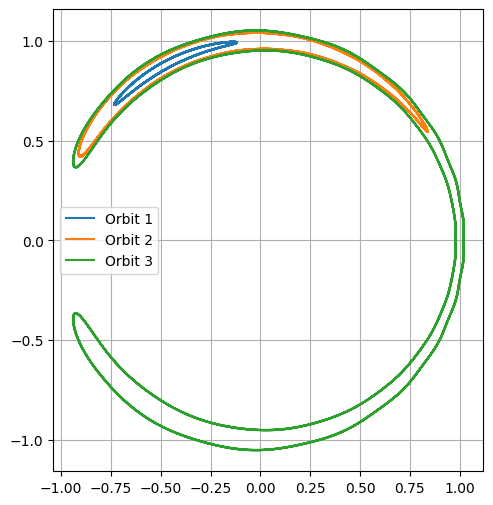

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(6,6))
ax.set_aspect(aspect='equal')

plt.grid()
for k, sol in enumerate(sols[:3]):
  plt.plot(sol.y[0], sol.y[1], label=simlabels[k])

plt.legend()

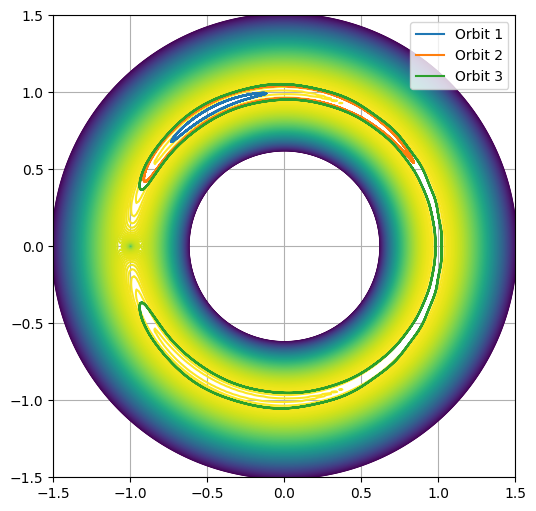

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(6,6))
ax.set_aspect(aspect='equal')

plt.grid()
plt.contour(xm, ym, Phis, np.linspace(-1.8,-1.5, 200))

for k, sol in enumerate(sols[:3]):
  plt.plot(sol.y[0], sol.y[1], label=simlabels[k])

plt.legend()

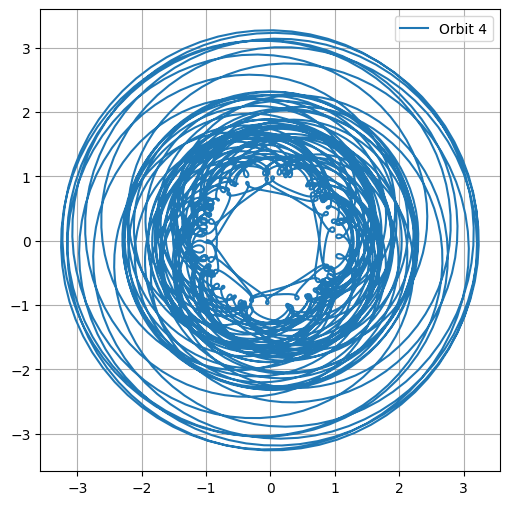

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(6,6))
ax.set_aspect(aspect='equal')

plt.grid()
plt.plot(sols[3].y[0, :], sols[3].y[1, :], label=simlabels[3])

plt.legend()

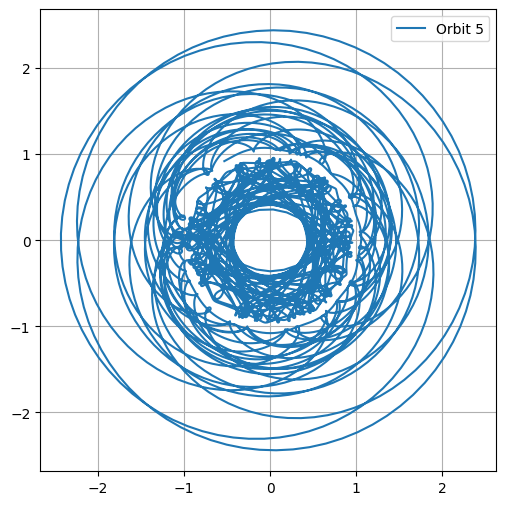

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(6,6))
ax.set_aspect(aspect='equal')

plt.grid()
plt.plot(sols[4].y[0, :], sols[4].y[1, :], label=simlabels[4])
plt.legend()